### 10 Academy: Artificial Intelligence Mastery
### Situational Overview 
### User Engagement Analysis

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans


# Add the scripts directory to the Python path
scripts_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\scripts'
src_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\src'
sys.path.append(scripts_dir)
sys.path.append(src_dir)
from connection import DatabaseConnector
from utils import DataUtils

### 1.1 Data Extraction 
### Connect to the database and pandas.

In [3]:
db_connector = DatabaseConnector()

# Connect to the database
db_connector.connect()

# Define and execute a query
query = "SELECT * FROM xdr_data;"
df = db_connector.execute_query(query)

# Print the DataFrame
if df is not None:
    print(df)
db_connector.close_connection()
print("Columns in DataFrame:", df.columns)

Connection successful.
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \


### 1.2 Data Cleansing 
### Missing Value, Outliers, and data conversion  

In [4]:
data_utils = DataUtils(df)
missing_summary = data_utils.check_missing_values()
#print("Missing Values Summary:\n", missing_summary)

Total columns with missing values: 41
Top 5 columns with the most missing values:
                                          Missing Values Percentage    Dtype
Nb of sec with 37500B < Vol UL                    130254      86.8%  float64
Nb of sec with 6250B < Vol UL < 37500B            111843      74.6%  float64
Nb of sec with 125000B < Vol DL                    97538      65.0%  float64
TCP UL Retrans. Vol (Bytes)                        96649      64.4%  float64
Nb of sec with 31250B < Vol DL < 125000B           93586      62.4%  float64


### 1.3 Handling Missing Value, 
### Outliers , Fix( Median, Mean) and Remove Outliers Based on Z Score  
handles skewness in the handle_missing_values method, where it decides whether to fill missing values with the median or mean based on the skewness of the distribution of the numeric columns.

In [5]:

df = data_utils.handle_missing_values()
#df.head()

outliers = data_utils.detect_outliers()

for column, outlier_indices in outliers.items():
    print(f"Outliers in column '{column}': {outlier_indices[:5]}")  # Show first 5 outlier indices

df = data_utils.fix_outliers()
df = data_utils.remove_outliers()
#df.head()
df = data_utils.convert_bytes_to_megabytes()

Missing values handled and high missing value columns dropped.
Outlier detection complete.
Outliers in column 'Bearer Id': Index([], dtype='int64')
Outliers in column 'Start ms': Index([], dtype='int64')
Outliers in column 'End ms': Index([], dtype='int64')
Outliers in column 'Dur. (ms)': Index([0, 1, 2, 3, 4], dtype='int64')
Outliers in column 'IMSI': Index([27541, 100027, 125042], dtype='int64')
Outliers in column 'MSISDN/Number': Index([125042, 126060], dtype='int64')
Outliers in column 'IMEI': Index([], dtype='int64')
Outliers in column 'Avg RTT DL (ms)': Index([467, 505, 516, 517, 596], dtype='int64')
Outliers in column 'Avg RTT UL (ms)': Index([58, 72, 184, 472, 595], dtype='int64')
Outliers in column 'Avg Bearer TP DL (kbps)': Index([86, 323, 405, 538, 557], dtype='int64')
Outliers in column 'Avg Bearer TP UL (kbps)': Index([132, 317, 331, 379, 539], dtype='int64')
Outliers in column 'TCP DL Retrans. Vol (Bytes)': Index([538, 786, 902, 923, 1067], dtype='int64')
Outliers in colu

### 2. User Engagement Analysis 

User engagement is a critical factor in telecom business success. Telecom firms can obtain important insights on how customers engage with their services by monitoring user activities such as session frequency, length, and data traffic across applications. Based on these measures, businesses can create engagement ratings that divide users into various categories and direct network resources to the areas that require them the most. While less active users might benefit from tailored attempts to boost their engagement, more engaged users might need more bandwidth and quicker speeds. By matching resources to user needs, telecom companies may increase service quality and spur company growth through an understanding of and optimization of user engagement.

Task 2.1 Calculating and summarizing the specified metrics(session frequency, length, and data traffic) for each customer ID (MSISDN), then identifying and reporting the top 10 customers based on each engagement metric.


In [6]:
results = data_utils.analyze_customer_engagement()
for key, value in results.items():
    print(f"\n{key}:")
    print(value)


Top 10 Customers by Number of Sessions:
             MSISDN  xDR_sessions  Session_duration       DL_data  \
43875  3.366371e+10          6604       624591709.0  2.858609e+12   
12031  3.362632e+10            18         1785419.0  6.908967e+09   
11722  3.362578e+10            16         1512653.0  6.377228e+09   
52545  3.366716e+10            13         1209703.0  5.052068e+09   
75282  3.376054e+10            13         1353633.0  6.798791e+09   
12448  3.362708e+10            12         1195340.0  5.309479e+09   
5708   3.361489e+10            11         1141611.0  4.524815e+09   
574    3.360313e+10            10          936938.0  3.876578e+09   
30947  3.365973e+10            10         1154046.0  4.297232e+09   
36926  3.366159e+10            10         1018210.0  3.217440e+09   

            UL_data    Total_data  
43875  2.640615e+11  3.122671e+12  
12031  6.498310e+08  7.558798e+09  
11722  6.497555e+08  7.026984e+09  
52545  5.663264e+08  5.618394e+09  
75282  6.075207e+08

Task 2.2 Normalizing each engagement metric(because clustering requires normalization for better utilization) and running a k-means (k=3) to classify customers in three groups of engagement. 

Metrics normalized.
Cluster centers:
 [[-1.41393603e-03  8.27890361e-01  5.26358940e-01  8.27890361e-01
   5.26358940e-01]
 [-4.67974390e-04  6.76521550e-02 -1.20578742e+00  6.76521550e-02
  -1.20578742e+00]
 [ 1.99592968e-03 -9.93605602e-01  4.27651053e-01 -9.93605602e-01
   4.27651053e-01]]
Number of customers in each cluster:
 Cluster
0    41696
2    36930
1    31278
Name: count, dtype: int64
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   500.0   

   Session_duration          IMSI        MSISDN          IMEI  \
0         -0.213277  2.082014e+14  3.366496e+10  3.552121e+13   
1         -0.213277  2.082019e+14  3.368185e

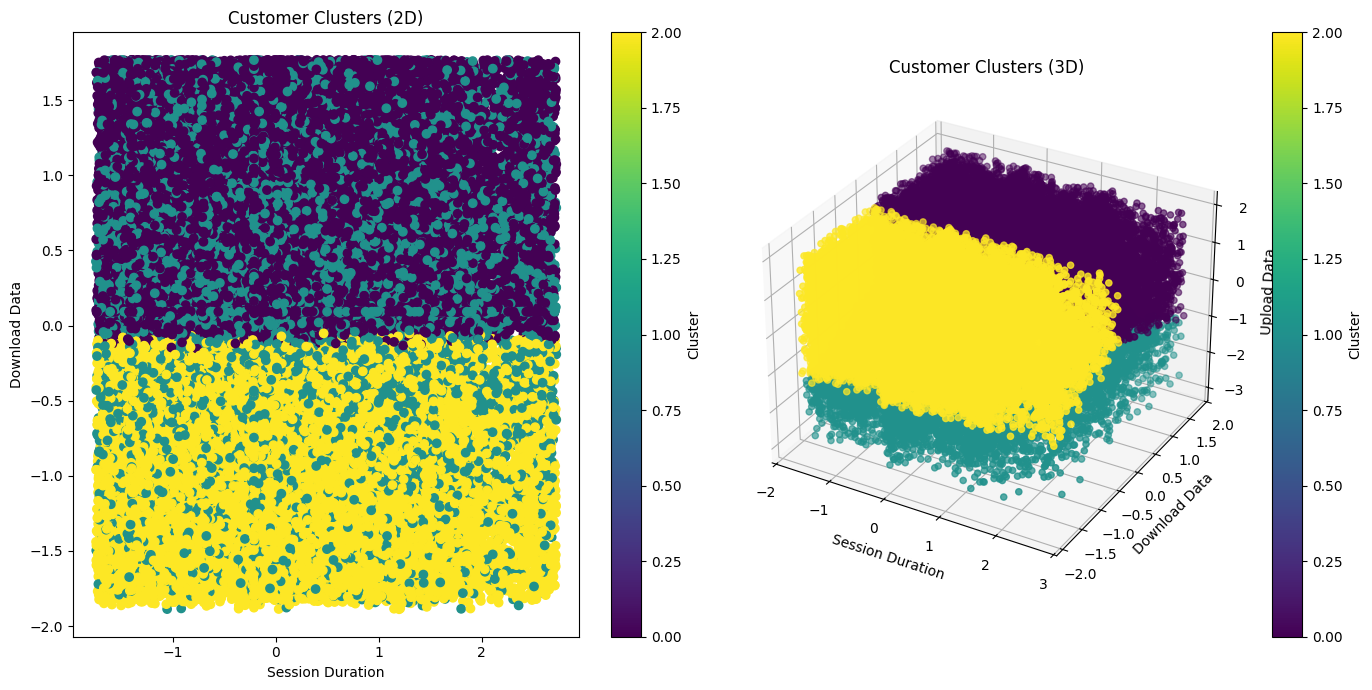

In [7]:
#print("Columns in DataFrame:", df.columns)
df_with_clusters, kmeans_model = data_utils.perform_kmeans_clustering(k=3)

# DataFrame with cluster assignments
print(df_with_clusters.head())

# Review the cluster centers and sizes
print("Cluster centers:\n", kmeans_model.cluster_centers_)
print("Number of customers in each cluster:\n", df_with_clusters['Cluster'].value_counts())
data_utils.plot_clusters()



We can identify the typical characteristics of each segment—such as high vs low data usage—by looking at cluster centers. Because of this segmentation, customized tactics are possible, including creating marketing campaigns that are specifically targeted at each cluster or providing support that is specific to their needs. For example, low-usage clusters may receive special deals, while high-usage clusters may profit from premium subscriptions. Understanding these segments also helps with resource optimization, which enhances network design and performance in high-data-consuming areas. Moreover, outliers—customers who don't cleanly fit into any segment—can be identified by clustering, indicating those with particular needs or problems that call for extra care. All things considered, clustering facilitates better strategic planning and decision-making by painting a clearer picture of the different kinds and behaviors of customers.

Task 2.3 Non-Normalized metric

  Cluster Session_duration                                  DL_data            \
                       min       max      mean        sum       min       max   
0       0        -1.746948  2.726646 -0.001460 -60.876494 -0.154563  1.768518   
1       1        -1.749701  2.726336 -0.000607 -19.000710 -1.887303  1.768324   
2       2        -1.748790  2.724456  0.002163  79.877204 -1.888273 -0.052060   

                            UL_data  ...                          \
       mean           sum       min  ...      mean           sum   
0  0.826529  34462.953100 -0.913126  ...  0.528629  22041.727174   
1  0.072550   2269.219709 -3.009884  ... -1.205811 -37715.340956   
2 -0.994643 -36732.172809 -1.260126  ...  0.424414  15673.613782   

  Total DL (MB)                                   Total UL (MB)            \
            min       max      mean           sum           min       max   
0     -0.154563  1.768518  0.826529  34462.953100     -0.913126  1.985940   
1     -1.887303  1.768

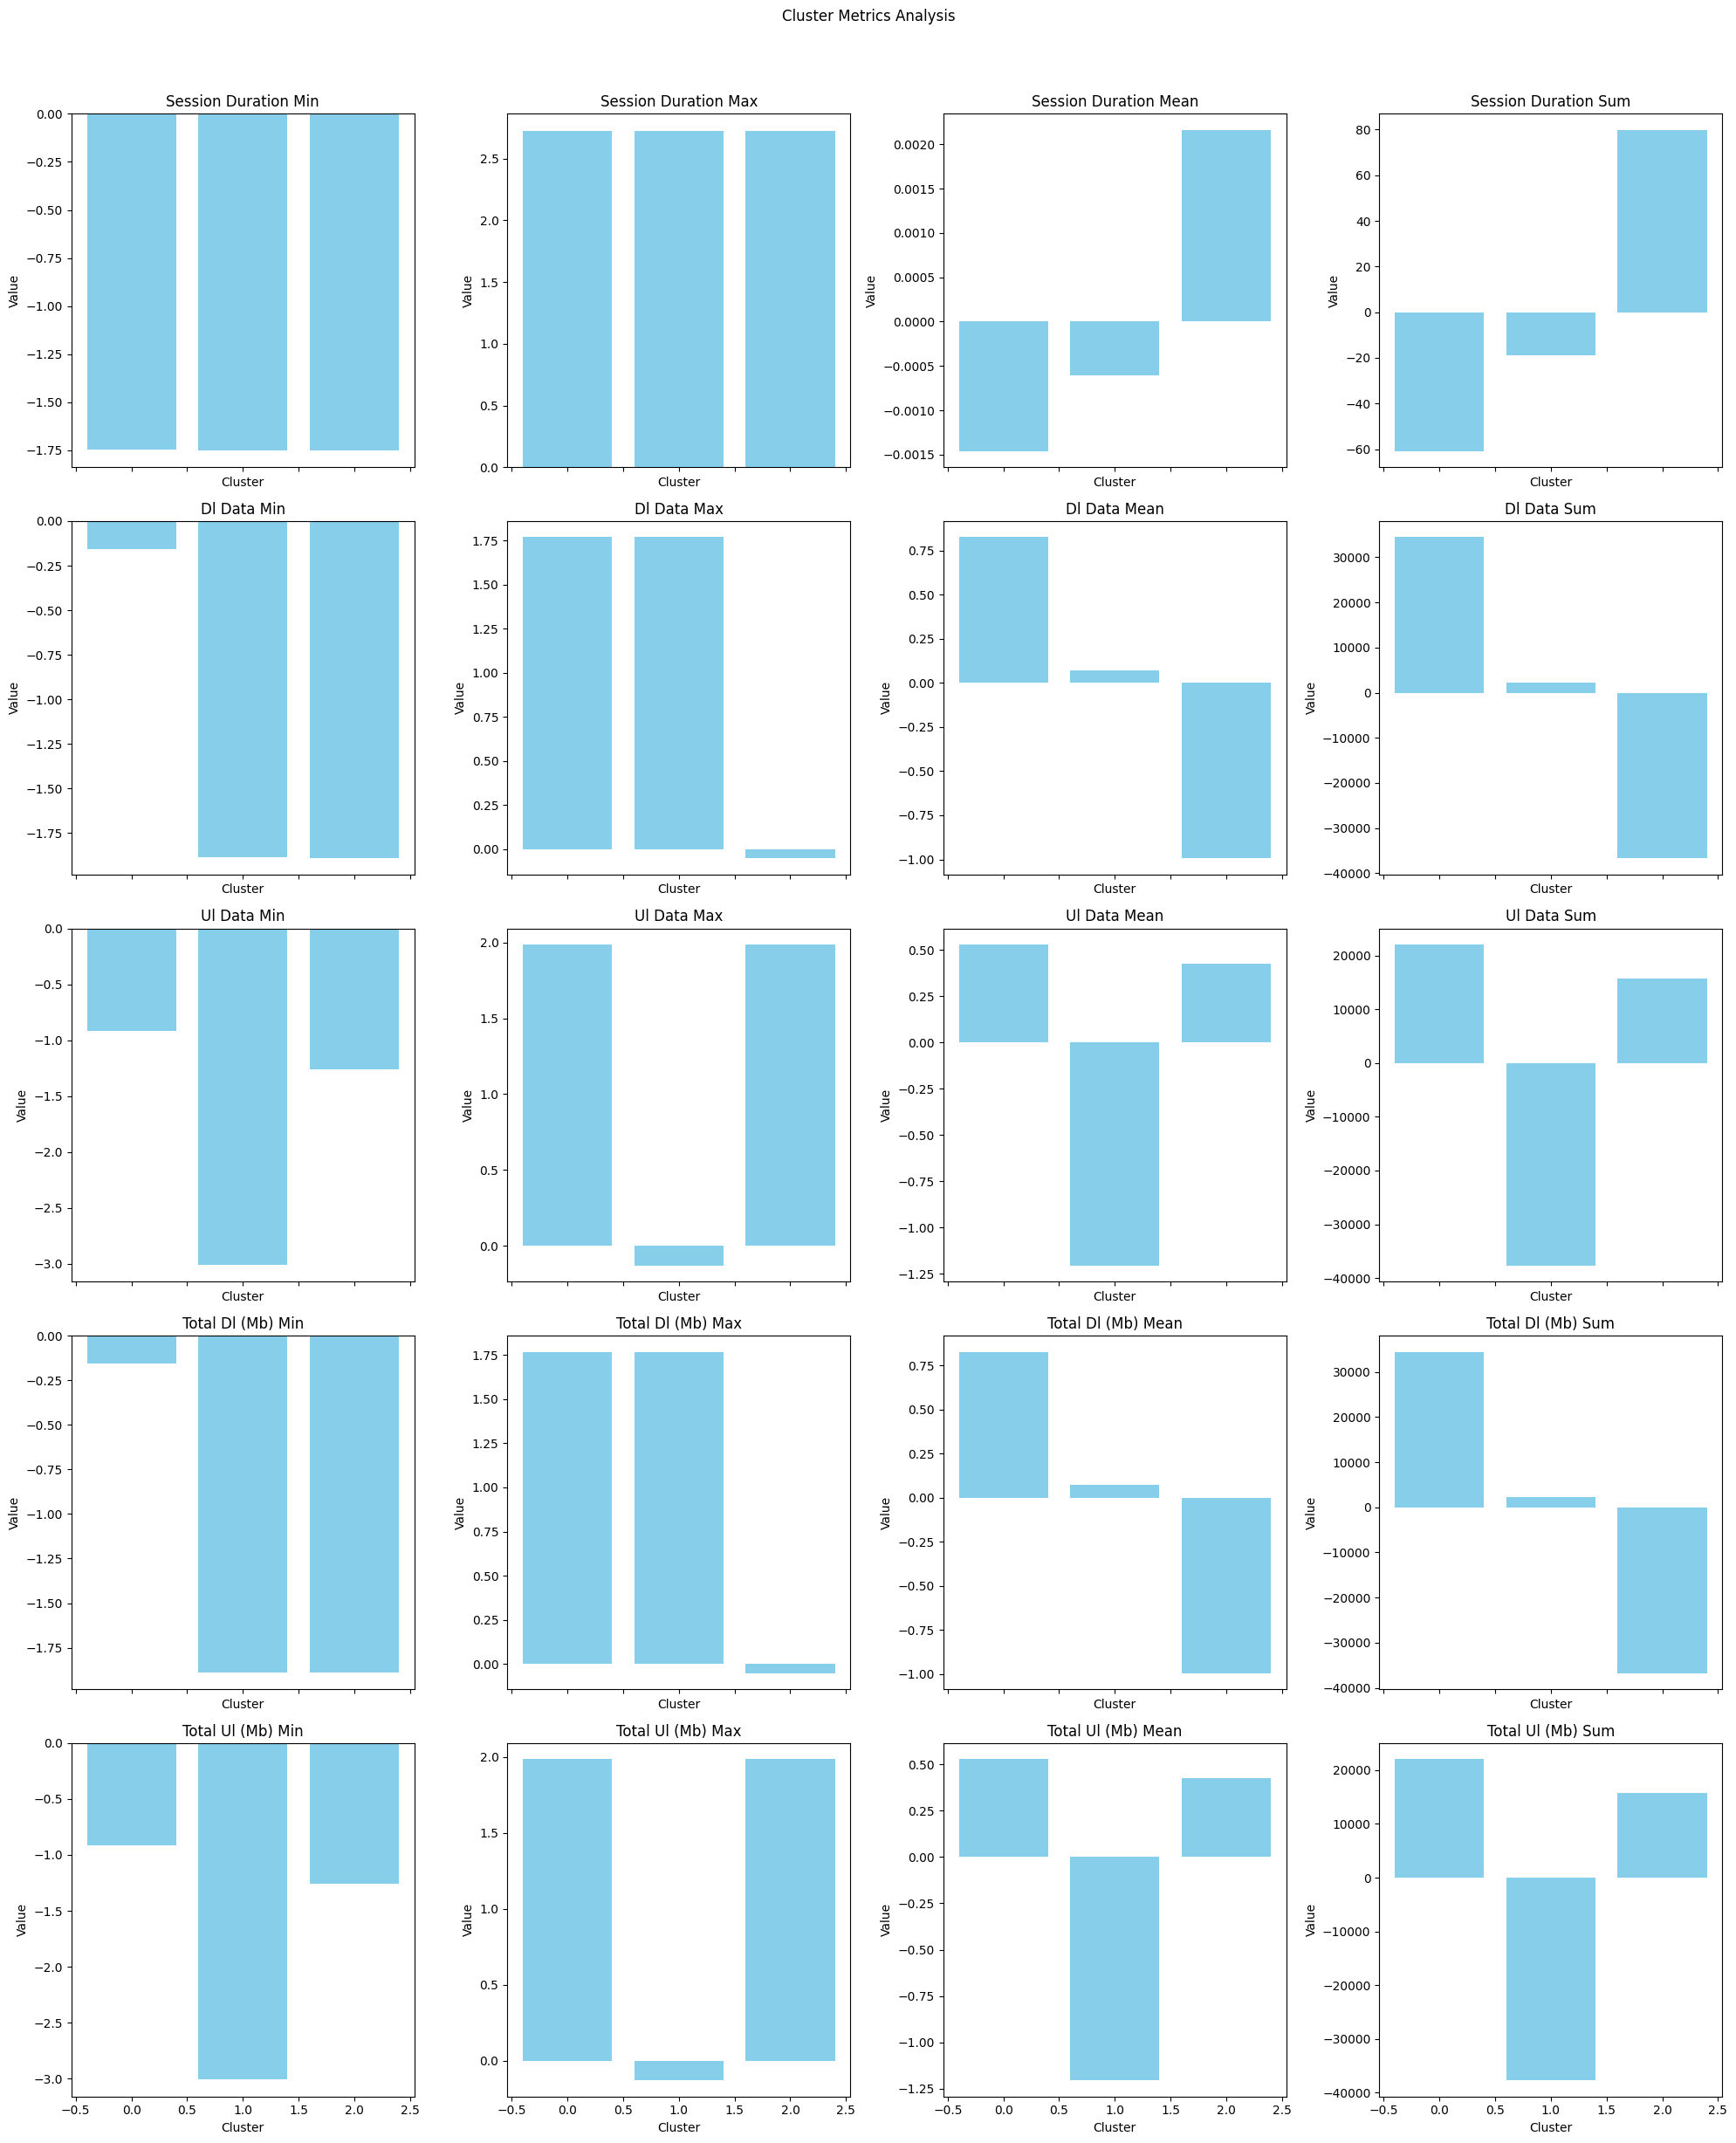

In [8]:
metrics = ['Session_duration', 'DL_data', 'UL_data', 'Total DL (MB)', 'Total UL (MB)']
metric_names = [metric.replace('_', ' ').title() for metric in metrics]
data_utils.compute_and_plot_cluster_metrics(metrics)

Total non-normalized metrics are raw, unadjusted figures that represent actual measurements without any changes, such as total data usage or session time. While they are useful in evaluating overall network load and customer activity, they must be normalized in order to make meaningful comparisons between various contexts or user groups.

Cluster 0 features a wide range of session durations, strong overall engagement, and data utilization. Cluster 1 exhibits poor user involvement as seen by its modest activity and data consumption. Cluster 2 has modest activity and data use, despite having high engagement and irregular data usage. These patterns aid in the customization of resource allocation and user interaction tactics.

Task 2.4 

Aggregated Data (first 5 rows):
          MSISDN  Social Media DL (MB)  Google DL (MB)  Netflix DL (MB)
0  3.360100e+10              2.104286        3.182528         9.789567
1  3.360100e+10              2.478168        4.003236         0.734872
2  3.360100e+10              3.002171        3.188594        15.760345
3  3.360101e+10              0.239820        5.662694         1.103746
4  3.360101e+10              1.296906        6.016790        20.196109
Top 10 users for Social Media DL (MB) (first 5 rows):
               MSISDN  Social Media DL (MB)  Google DL (MB)  Netflix DL (MB)
43875  33663706799.0          10703.915654    34740.551926     70121.557795
12031  33626320676.0             39.193649      105.305023       190.238226
75282  33760536639.0             31.952645       73.251412       116.651304
52545  33667163239.0             22.653344       63.019120       160.152822
11722  33625779332.0             19.514076       93.567552       170.017103
Top 10 users for Google DL (MB

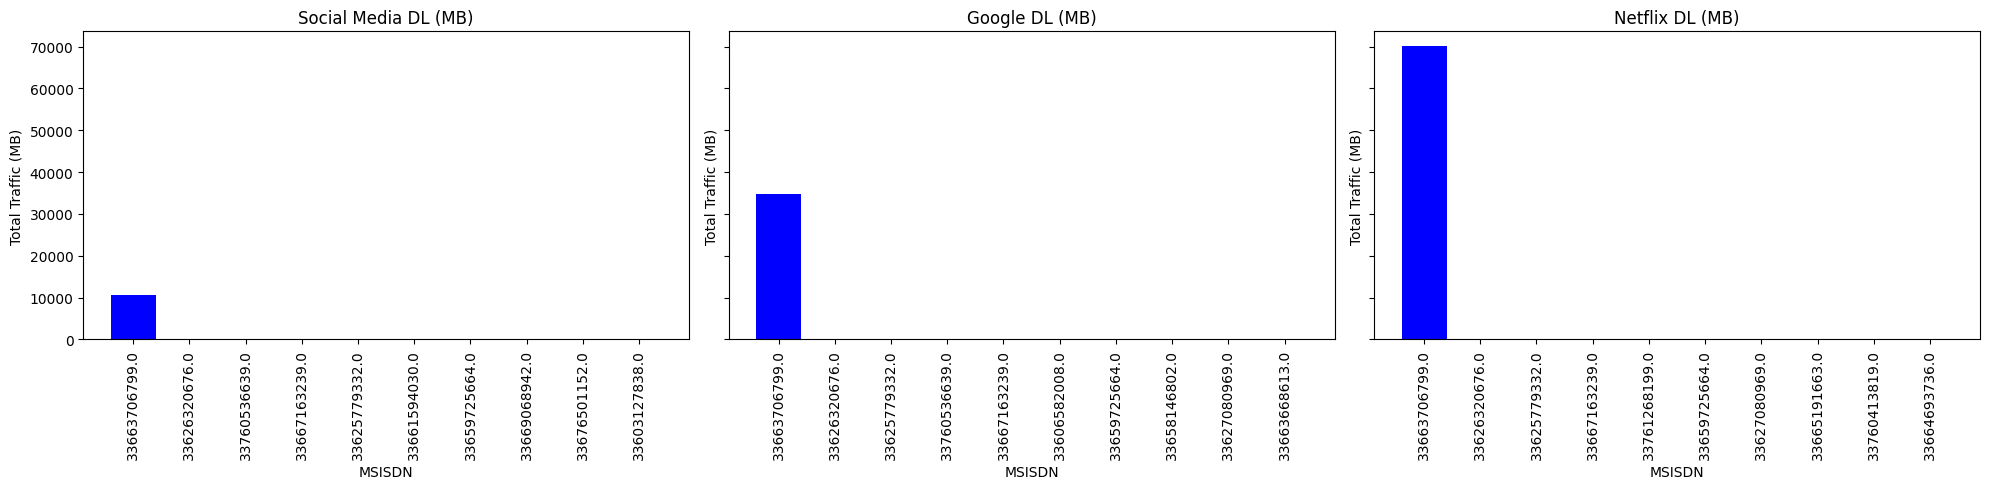

In [9]:
data_utils.aggregate_user_traffic()

# Get top 10 engaged users per application
data_utils.top_engaged_users()

# Plot the top 3 most used applications
data_utils.plot_top_applications()

User 33663706799 has indeed exhibited significant data usage across multiple platforms:

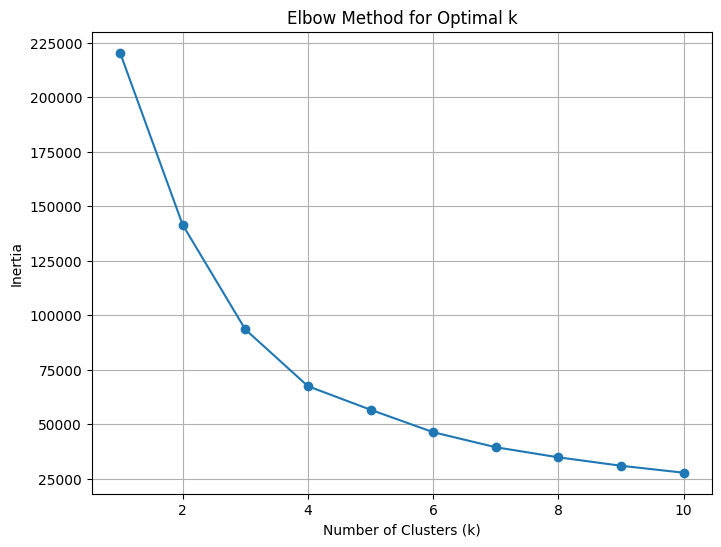

In [10]:
columns_to_scale = ['Social Media DL (MB)', 'Google DL (MB)', 'Netflix DL (MB)']
df, cluster_summary, optimal_k = data_utils.cluster_analysis(columns_to_scale, max_k=10)

# Print the optimal number of clusters and the cluster summary
print(f'Optimal number of clusters (k): {optimal_k}')
#print(cluster_summary)

### Reference 
1. https://www.geeksforgeeks.org/k-means-clustering-introduction/
2. https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning
3. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

